In [4]:

#Try to use bm3d
#!pip install pydicom
import matplotlib.pyplot as plt
#import pydicom
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from importlib import reload
from scipy import ndimage as nd
from skimage.metrics import peak_signal_noise_ratio
from skimage import img_as_float
from skimage import io

from build_dct_unitary_dictionary import build_dct_unitary_dictionary

from im2col import im2col
from col2im import col2im
from compute_psnr import compute_psnr

#CCH 20200520 widthen display output
np.set_printoptions(formatter={'float': lambda x: " {0:7.3f}".format(x)})


C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


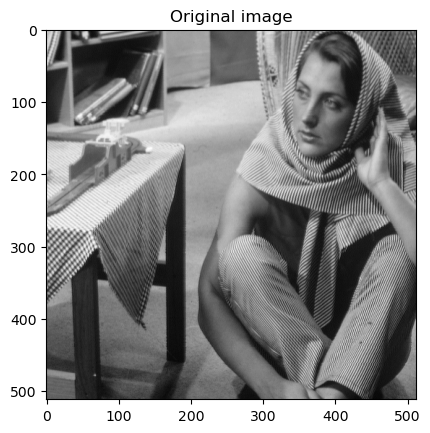

In [5]:
# Read an image
im = np.array(Image.open('barbara.png'))
#im = img_as_float(im)
# im = np.array(Image.open('misc\\brain4.jpg'))

# Show the image
plt.figure(0)
plt.imshow(im,'gray') 
plt.title('Original image')
plt.show()

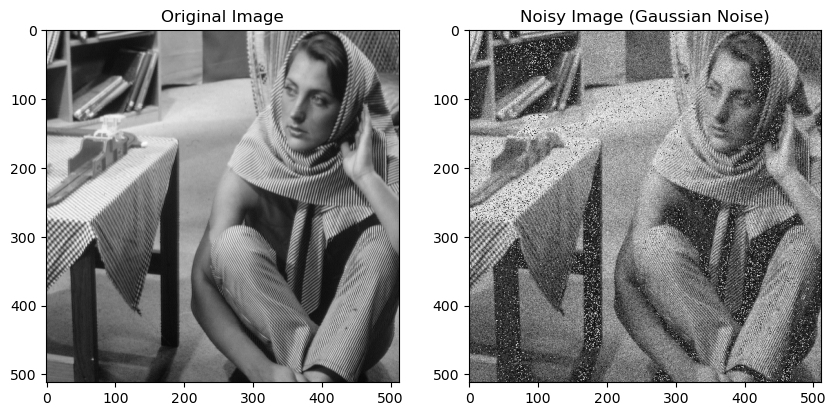

In [6]:
# Read an image
im = np.array(Image.open('barbara.png'))


# Parameters for Gaussian noise
mean = 0
stddev = 25  # You can adjust this to control the amount of noise

# Generate Gaussian noise with the same shape as the image
noise = np.random.normal(mean, stddev, im.shape).astype(np.uint8)

# Add the noise to the image
noisy_image = np.clip(im + noise, 0, 255).astype(np.uint8)

# Show the original and noisy images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(im, cmap='gray')
plt.title('Original Image')

# Noisy image
plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image (Gaussian Noise)')

plt.show()

In [7]:
print(noisy_image)

[[184 245 200 ...  92 102 142]
 [150 199 213 ...  99  73  77]
 [202 196 207 ...  85 127 151]
 ...
 [ 99  82  97 ... 117 142  65]
 [107  50  79 ...  99  91  86]
 [112 133 123 ... 120  79 131]]


In [7]:
#turn into float for skitimage

noisy_image = img_as_float(noisy_image)
print(noisy_image.shape)
print(im.shape)


(512, 512)
(512, 512)


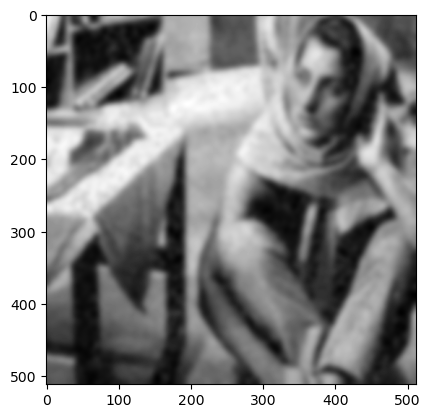

In [8]:
#gaussian filter
#Higher the sigma better denoising typically
gaussian_img = nd.gaussian_filter(noisy_image,sigma=4)
#its a bit blurry, but denoisede
plt.imshow(gaussian_img, cmap='gray')

In [10]:
noise_psnr= peak_signal_noise_ratio(im,noisy_image)
gaussian_cleaned_psnr = peak_signal_noise_ratio(im,gaussian_img)
print("PSNR noisy_image = " , noise_psnr)
print("PSNR of cleaned image = " , gaussian_cleaned_psnr)




PSNR noisy_image =  5.921108481802296
PSNR of cleaned image =  5.920079713899423


C:\Users\gyard\AppData\Local\Temp\ipykernel_6352\3569355622.py:1: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  noise_psnr= peak_signal_noise_ratio(im,noisy_image)
C:\Users\gyard\AppData\Local\Temp\ipykernel_6352\3569355622.py:2: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  gaussian_cleaned_psnr = peak_signal_noise_ratio(im,gaussian_img)


In [9]:
#Bilateral filter (very slow!)

from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,denoise_wavelet,estimate_sigma)
denoise_bilateral = denoise_bilateral(noisy_image,sigma_spatial=1)

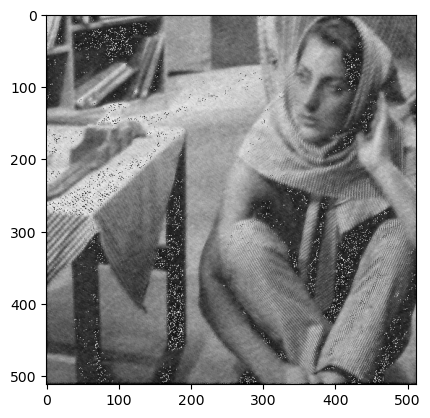

In [10]:
plt.imshow(denoise_bilateral, cmap='gray')

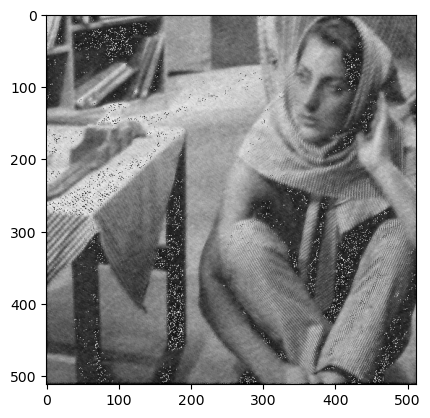

In [11]:
#Denoise_TV
denoise_tv= denoise_tv_chambolle(noisy_image,weight=0.3)
plt.imshow(denoise_bilateral, cmap='gray')
# plt.imshow(noisy_image, cmap='gray')
# plt.title('Noisy Image (Gaussian Noise)')

C:\Users\gyard\AppData\Local\Temp\ipykernel_3264\385578102.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


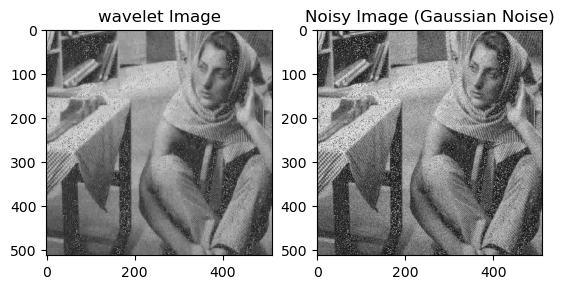

In [12]:
#Denoise wavelet

wavlet_smoothed = denoise_wavelet(noisy_image,method='BayesShrink',mode='soft')
plt.imshow(wavlet_smoothed, cmap='gray')

# plt.imshow(noisy_image, cmap='gray')
# plt.title('Noisy Image (Gaussian Noise)')

# Original image
plt.subplot(1, 2, 1)
plt.imshow(wavlet_smoothed, cmap='gray')
plt.title('wavelet Image')

# Noisy image
plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image (Gaussian Noise)')

plt.show()


In [17]:
from medpy.filter.smoothing import anisotropic_diffusion
import cv2
from skimage import io

im= img_as_float(im)

#anisotropic diffusion

img_aniso_filtered = anisotropic_diffusion(noisy_image,niter=50, gamma=0.2,option=2)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

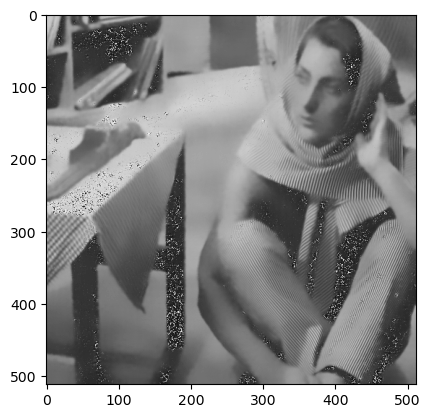

In [13]:
#NLM (non local means)

from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte,img_as_float

sigma_est = np.mean(estimate_sigma(noisy_image))

NLM_skimg_denoise_img = denoise_nl_means(noisy_image, h= 1.05*sigma_est,fast_mode=True,patch_size=6)
plt.imshow(NLM_skimg_denoise_img, cmap='gray')

In [14]:
#CV2 nlm (do not convert to float)

NLM_CV2= cv2.fastNlMeansDenoising(noisy_image,True,3,7,21)
plt.imshow(NLM_CV2, cmap='gray')

NameError: name 'cv2' is not defined

In [16]:
#Block Matching 3d filtering BM3D (needs to be float)
import bm3d 

BM3D_denoised= bm3d.bm3d(noisy_image,sigma_psd=0.2,stage_arg=bm3d.BM3DStages.ALL_STAGES)

plt.imshow(BM3D_denoised, cmap='gray')

ModuleNotFoundError: No module named 'bm3d'